# Setup

In [16]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Set global variables

path_csv_path = 'logs/path.csv'
tracker_csv_path = 'logs/tracker.csv'

In [18]:
# Read the path and tracker files into Pandas DataFrames

path_df = pd.read_csv(path_csv_path)
tracker_df = pd.read_csv(tracker_csv_path)

# Data Analysis

In [19]:
# Take a little look at the data in the DataFrames
# path_df.head(25)
tracker_df.head(25)

,Unnamed: 0,index,x_trk,y_trk,z_trk,t_trk
0,0,3180,-36.507133,-40.170982,-2915.784424,1633969004633871000
1,1,3181,-36.543438,-40.260765,-2915.713623,1633969004648860000
2,2,3182,-36.645119,-40.364326,-2915.732910,1633969004662330000
3,3,3183,-36.709301,-40.413754,-2915.772949,1633969004674115000
4,4,3184,-36.720108,-40.421989,-2915.788086,1633969004687849000
5,5,3185,-36.724915,-40.427578,-2915.725586,1633969004699959000
6,6,3186,-36.668312,-40.436436,-2915.676758,1633969004713613000
7,7,3187,-36.652710,-40.457592,-2915.729492,1633969004730045000
8,8,3188,-36.705055,-40.492893,-2915.809814,1633969004741991000
9,9,3189,-36.777580,-40.530525,-2915.860596,1633969004754114000


## 1. "z" dimension

### 1.1. It seems that the "z" dimension of path_df has a lot of values at or very near to 0. Let's check that out.

array([[<AxesSubplot:title={'center':'z_pth'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

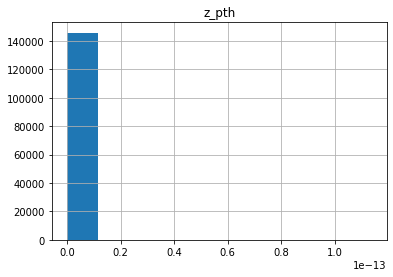

In [20]:
## QUALITATIVE ANALYSIS ##

# First, let's plot a histogram of the 'z_pth' values in path_df
plt.figure()
path_df.hist(column='z_pth')

In [21]:
## QUANTITATIVE ANALYSIS ##

# Get statistics on z_pth column
z_pth_mean = path_df['z_pth'].mean()
z_pth_std = path_df['z_pth'].std()

print(f"The 'z_pth' column has a mean of {z_pth_mean} and an std of {z_pth_std}")

The 'z_pth' column has a mean of 7.795259064434285e-19 and an std of 2.976941975007739e-16


### With a mean very close to 0 and a standard deviation very close to zero, we will disregard the z_pth dimension of path_df

### 1.2. Let's check out the "z" dimension of tracker_df as well

array([[<AxesSubplot:title={'center':'z_trk'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

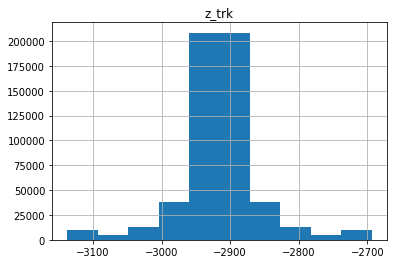

In [22]:
## QUALITATIVE ANALYSIS ##

# First, let's plot a histogram of the 'z_trk' values in tracker_df
plt.figure()
tracker_df.hist(column='z_trk')

In [23]:
## QUANTITATIVE ANALYSIS ##

# Get statistics on z_trk column
z_trk_mean = tracker_df['z_trk'].mean()
z_trk_std = tracker_df['z_trk'].std()

print(f"The 'z_trk' column has a mean of {z_trk_mean} and an std of {z_trk_std}")

The 'z_trk' column has a mean of -2915.682661820343 and an std of 57.930370443016606


#### This one seems more tricky. I want to see if there are any correlations between the z_trk column and other columns

<AxesSubplot:title={'center':'z_trk and index'}, xlabel='z_trk', ylabel='index'>

<Figure size 432x288 with 0 Axes>

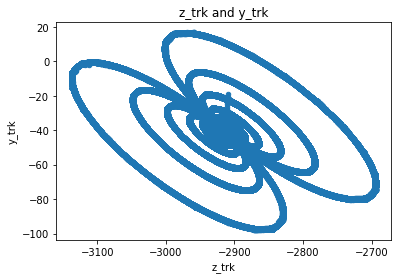

<Figure size 432x288 with 0 Axes>

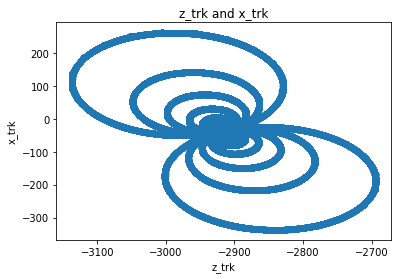

<Figure size 432x288 with 0 Axes>

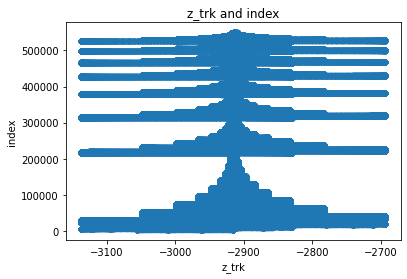

In [24]:
# Create scatterplots to find correlation between 'z_trk' and other columns

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='y_trk', title='z_trk and y_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='x_trk', title='z_trk and x_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='index', title='z_trk and index')

<AxesSubplot:title={'center':'x_trk and z_trk'}, xlabel='x_trk', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

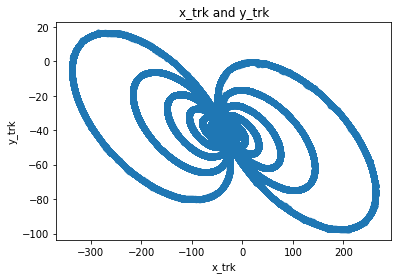

<Figure size 432x288 with 0 Axes>

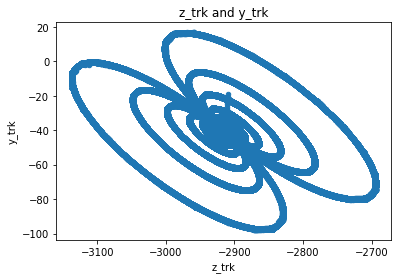

<Figure size 432x288 with 0 Axes>

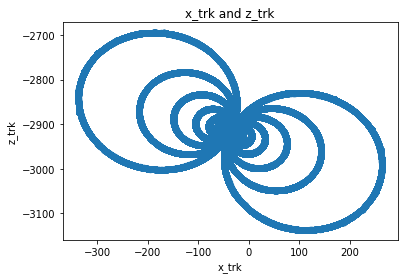

In [25]:
plt.figure()
tracker_df.plot(kind='scatter', x='x_trk', y='y_trk', title='x_trk and y_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='y_trk', title='z_trk and y_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='x_trk', y='z_trk', title='x_trk and z_trk')


# Data Cleaning

## 1. Remove unnecessary data

In [26]:
# Remove the "time" and "Unnamed: 0" dimension in path_df and the "Unnamed: 0" and "time" dimension in tracker_df
path_df.drop(columns=['t_pth', 'Unnamed: 0'], inplace=True)
tracker_df.drop(columns=['t_trk', 'Unnamed: 0'], inplace=True)
path_df.head()

,index,x_pth,y_pth,z_pth
0,177,450.0,700.0,1.136868e-13
1,178,450.0,700.0,0.000000e+00
2,179,450.0,700.0,0.000000e+00
3,180,450.0,700.0,0.000000e+00
4,181,450.0,700.0,0.000000e+00


## 2. Concatenate the two dataframes together

In [27]:
# We'll use an inner join to disregard all of the indices listed in path_df but not in tracker_df

merged_df = path_df.merge(tracker_df, how='inner', on='index', suffixes=('_path', '_tracker'))
merged_df.head()

,index,x_pth,y_pth,z_pth,x_trk,y_trk,z_trk
0,3180,601.989607,810.426914,0.0,-36.507133,-40.170982,-2915.784424
1,3181,601.989607,810.426914,0.0,-36.543438,-40.260765,-2915.713623
2,3182,601.989607,810.426914,0.0,-36.645119,-40.364326,-2915.732910
3,3183,601.989607,810.426914,0.0,-36.709301,-40.413754,-2915.772949
4,3184,601.989607,810.426914,0.0,-36.720108,-40.421989,-2915.788086


## 3. Create derived columns

In [33]:
# Make new columns representing the difference between _trk and _pth columns

merged_df['x_dif'] = merged_df['x_pth'] - merged_df['x_trk']
merged_df['y_dif'] = merged_df['y_pth'] - merged_df['y_trk']
merged_df['z_dif'] = merged_df['z_pth'] - merged_df['z_trk']

## 4. Find correlations amongst columns

<AxesSubplot:title={'center':'x_pth and z_trk'}, xlabel='x_pth', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

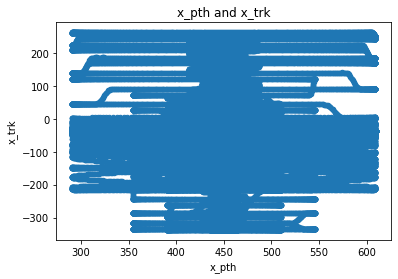

<Figure size 432x288 with 0 Axes>

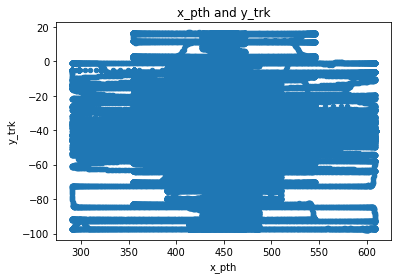

<Figure size 432x288 with 0 Axes>

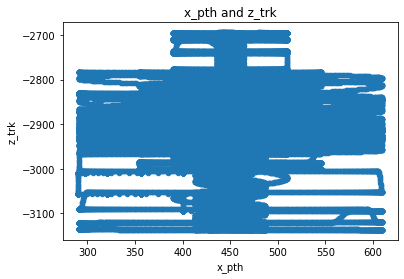

In [28]:
# Correlations from x_pth to other columns

plt.figure()
merged_df.plot(kind='scatter', x='x_pth', y='x_trk', title='x_pth and x_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_pth', y='y_trk', title='x_pth and y_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_pth', y='z_trk', title='x_pth and z_trk')

No notable correlations, which makes sense for y_trk and z_trk, but not x_trk! x_pth and x_trk should be very strongly correlated in ideal conditions.

<AxesSubplot:title={'center':'x_pth and z_trk'}, xlabel='y_pth', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

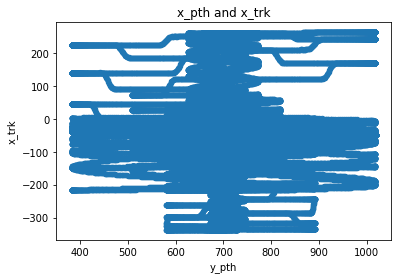

<Figure size 432x288 with 0 Axes>

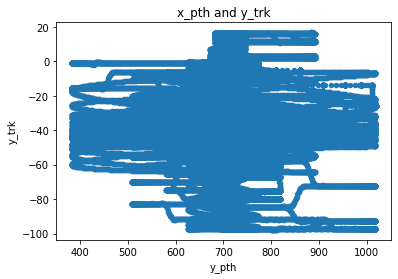

<Figure size 432x288 with 0 Axes>

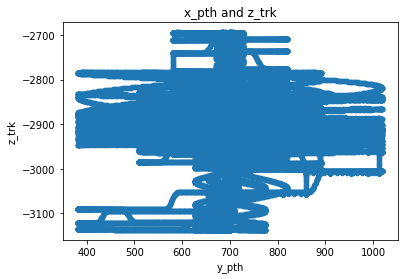

In [29]:
# Correlations from y_pth to other columns

plt.figure()
merged_df.plot(kind='scatter', x='y_pth', y='x_trk', title='x_pth and x_trk')

plt.figure()
merged_df.plot(kind='scatter', x='y_pth', y='y_trk', title='x_pth and y_trk')

plt.figure()
merged_df.plot(kind='scatter', x='y_pth', y='z_trk', title='x_pth and z_trk')

Again, no notable correlations, which makes sense for x_trk and z_trk, but not y_trk! y_pth and y_trk should be very strongly correlated in ideal conditions.

<AxesSubplot:title={'center':'x_dif and z_trk'}, xlabel='x_dif', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

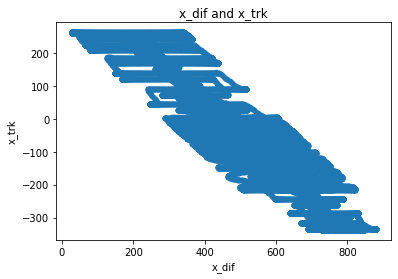

<Figure size 432x288 with 0 Axes>

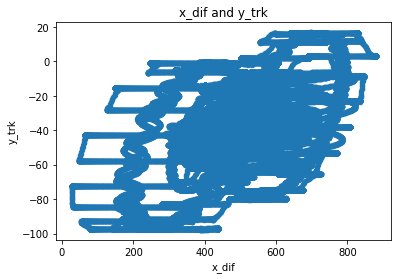

<Figure size 432x288 with 0 Axes>

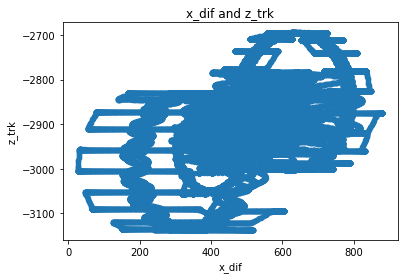

In [35]:
# Correlations from x_dif to other columns

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='x_trk', title='x_dif and x_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='y_trk', title='x_dif and y_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='z_trk', title='x_dif and z_trk')

Let's try to plot things in 3D.

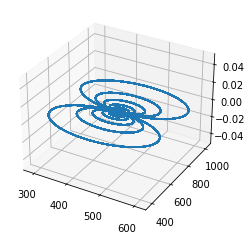

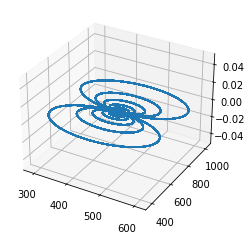

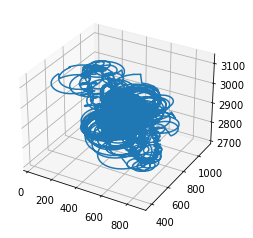

In [34]:
# First, we'll plot the path.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(merged_df['x_pth'], merged_df['y_pth'], merged_df['z_pth'])

# Then, we'll plot the tracked path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(merged_df['x_pth'], merged_df['y_pth'], merged_df['z_pth'])

# Finally, let's plot the difference between the paths
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(merged_df['x_dif'], merged_df['y_dif'], merged_df['z_dif'])

plt.show()